In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('../CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df.replace('C-', 'C')
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,1
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,1


In [4]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [5]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [6]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,1,0,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,1,0,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,1,0,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,1,0,0,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [7]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,1,0,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,1,0,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,1,0,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,1,0,0,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,1,0,0,0,2.3,0.8,0.6,0.4,5.1


In [8]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\si

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,2.633067,0.465495,1.554361,4.471507,1.548442
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.618591,-0.593309,0.788456,2.283816,-0.134317
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.989679,-0.099200,-0.232752,0.096124,0.955921
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,0.830641,0.324322,0.277852,-0.216403,1.524741
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,-0.070572,-0.310961,0.277852,0.408652,-0.086916


In [10]:
df3 = df1[0:586]
df4 = df1[586:]

In [11]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [12]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

AxesSubplot(0.127273,0.125;0.617727x0.755)


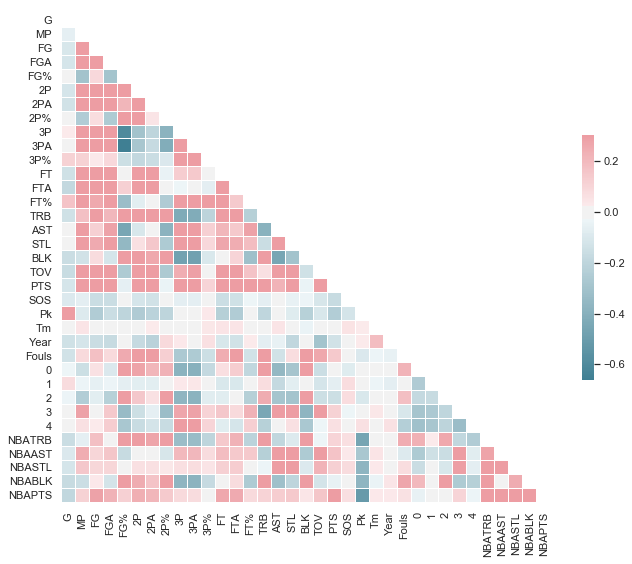

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 27)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)

In [23]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PTS,SOS,Pk,Year,0,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,2.505319,-0.724209,-0.661615,-0.067594,-1.547307,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,2.649874,0.557136,-0.015706,-0.306428,-1.485160,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,0.192436,0.272392,1.464502,-0.179639,-1.360865,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.674895,0.130021,-0.042619,0.056246,-1.298718,-1.747199,-0.520136,-0.343753,-0.546974,-0.590708
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,0.192436,-1.008952,-0.231009,0.477891,-1.236571,-1.747199,-0.520136,-0.343753,-0.546974,-0.590708


In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)

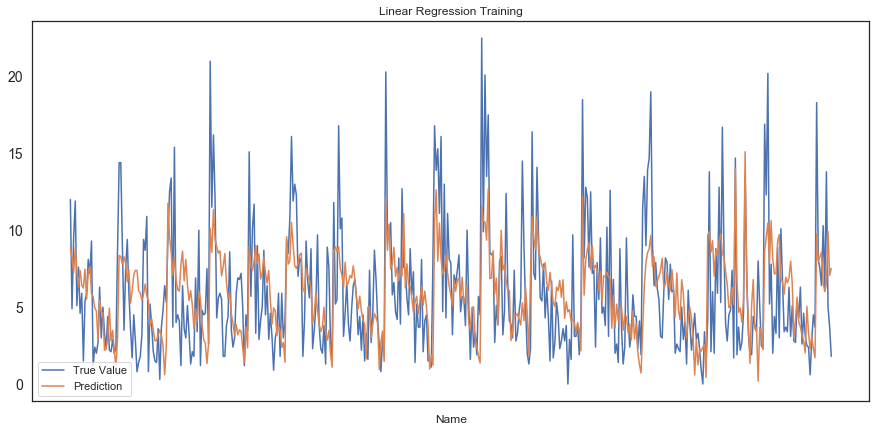

adj train r^2 = 0.33192596846586186
train mse = 10.492345135007126


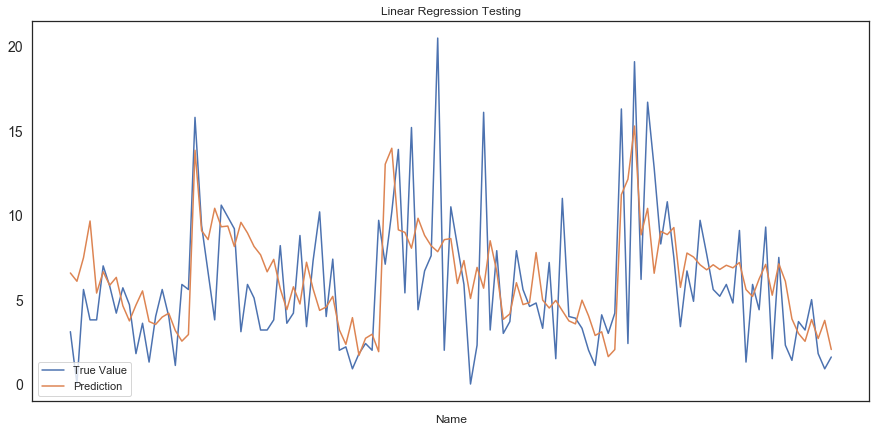

adj test r^2 = 0.19249476570134139
test mse = 12.466314650285831


In [26]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

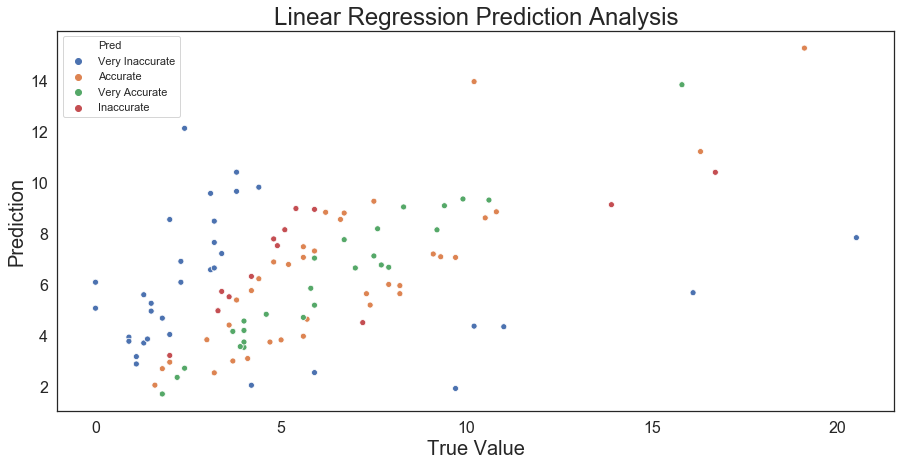

This model is able to relatively accurately predict 31.62% of NBA Rookies.
This model is able to very accurately predict 22.22% of NBA Rookies.


In [27]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

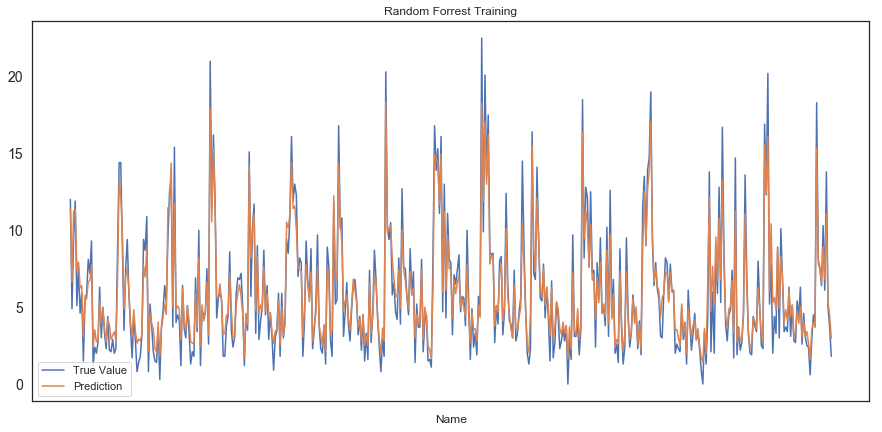

adj train r^2 = 0.9137980939534984
train mse = 1.3538322204477637


In [29]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

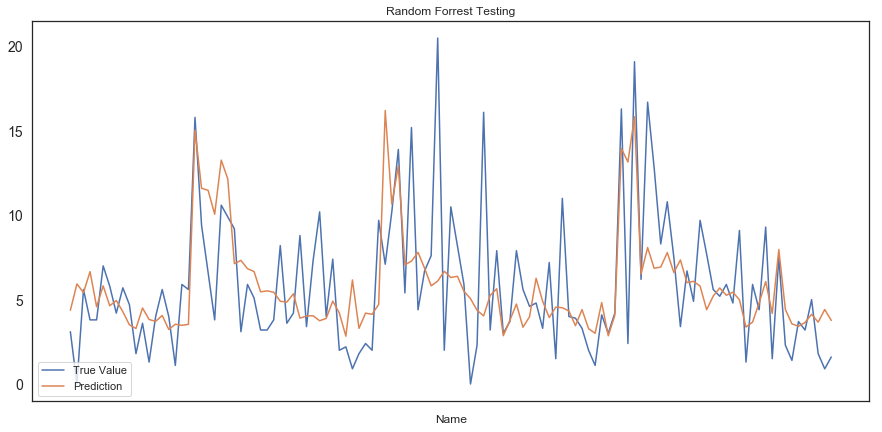

adj test r^2 = 0.21038702819010413
test mse = 12.190092819743583


In [30]:
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

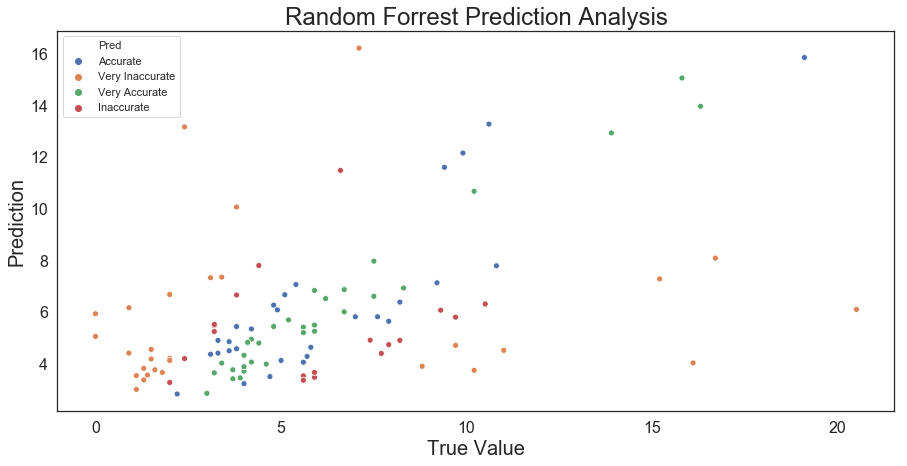

This model is able to relatively accurately predict 24.79% of NBA Rookies.
This model is able to very accurately predict 27.35% of NBA Rookies.


In [31]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [33]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Wesley Iwundu,-0.123584,-0.240374,0.022550,-0.216403,3.7,3.7682,Very Accurate,0.0682
Patrick McCaw,-0.547685,-0.099200,0.022550,-0.216403,4.0,3.8864,Very Accurate,0.1136
Jaron Blossomgame,0.618591,-0.522722,-0.488053,0.096124,4.2,4.0674,Very Accurate,0.1326
Davon Reed,-0.282622,-0.452135,0.022550,-0.528930,3.0,2.8625,Very Accurate,0.1375
Jabari Bird,-0.494672,-0.452135,-0.743355,-0.528930,3.0,2.8569,Very Accurate,0.1431


In [34]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Donovan Mitchell,0.671603,1.736061,2.575569,0.096124,20.5,6.1003,Very Inaccurate,14.3997
Kyle Kuzma,2.049929,0.394909,0.277852,0.408652,16.1,4.0336,Very Inaccurate,12.0664
Jaren Jackson,-0.812747,-0.522722,0.022550,-0.841458,2.4,13.1576,Very Inaccurate,10.7576
Markelle Fultz,0.353528,1.806648,1.043758,0.096124,7.1,16.2038,Very Inaccurate,9.1038
Collin Sexton,0.247503,1.241952,0.022550,-0.528930,16.7,8.0865,Very Inaccurate,8.6135


In [35]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [36]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
RJ Barrett,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
DeAndre Hunter,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Darius Garland,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Coby White,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658


In [38]:
from sklearn.feature_selection import RFE
import keras.backend as K

cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 30)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14).fit(train_x3.values, train_y[col].values.ravel())
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

Using TensorFlow backend.


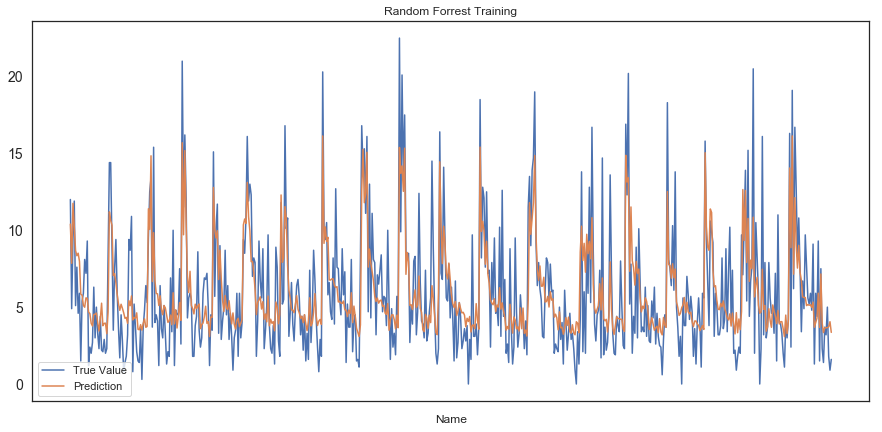

adj train r^2 = 0.6140437499760275
train mse = 6.0826817838635225


In [39]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

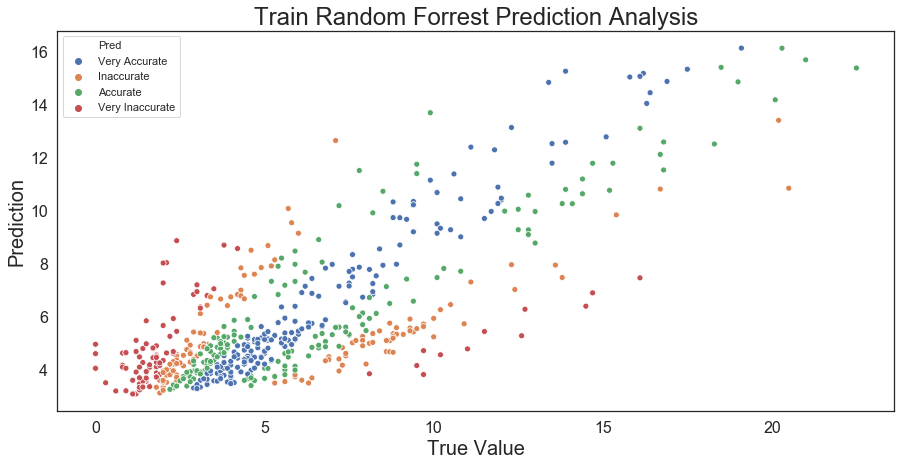

This model should be able to relatively accurately predict 28.33% of NBA Rookies.
This model should be able to very accurately predict 32.59% of NBA Rookies.


In [40]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model should be able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

In [41]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]
test_y2

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,7.451676,2.085440,1.250551,1.077361,14.182662
RJ Barrett,4.188231,3.583365,0.653794,0.221558,13.234225
DeAndre Hunter,3.650255,1.502681,0.563384,0.268780,9.468091
Darius Garland,3.379148,3.583104,0.602300,0.229747,9.959902
Coby White,2.965176,4.503680,0.768471,0.184524,11.200541
Jarrett Culver,3.421146,1.682058,0.686441,0.214976,9.105906
Bruno Fernando,4.674050,0.780532,0.425080,0.641190,7.235010
Mfiondu Kabengele,3.459012,0.784298,0.425751,0.474866,7.362201
Nassir Little,3.147077,0.791954,0.407990,0.224894,8.611882


In [42]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,7.451676,2.085440,1.250551,1.077361,14.182662,33.236569
Ja Morant,4.498972,6.055018,0.896828,0.393013,14.777746,33.128561
RJ Barrett,4.188231,3.583365,0.653794,0.221558,13.234225,26.261205
Coby White,2.965176,4.503680,0.768471,0.184524,11.200541,24.373257
Darius Garland,3.379148,3.583104,0.602300,0.229747,9.959902,21.885677
Cam Reddish,3.084224,1.244250,1.035427,0.229305,10.519789,19.881430
Jaxson Hayes,3.955101,0.862479,0.500010,1.318771,8.249146,19.745327
DeAndre Hunter,3.650255,1.502681,0.563384,0.268780,9.468091,18.598911
Jarrett Culver,3.421146,1.682058,0.686441,0.214976,9.105906,18.438621


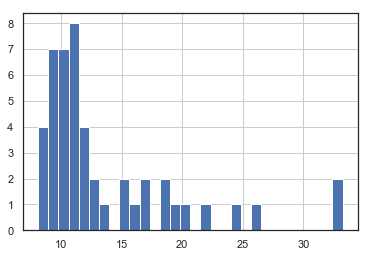

Value Distribution in Draft


In [43]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')

In [46]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Terance Mann,2.61,0.88,0.42,0.15,4.67,10.83
Ty Jerome,1.42,2.35,0.42,0.09,4.00,10.76
Tyler Cook,3.10,0.71,0.36,0.23,4.28,10.84
Tyler Herro,1.73,1.82,0.46,0.14,5.52,12.11
Zion Williamson,7.45,2.09,1.25,1.08,14.18,33.24
